In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [2]:
Ladata = cl.import_data('data/mskcc/mskcc_expr_fdr_1.csv', 'data/mskcc/mskcc_clinical.csv')
darr = Ladata[0]
labels = Ladata[1]
print(len(Ladata[0]))
len(Ladata[1])

129


129

In [3]:
k = cl.K(darr)
kmeans = KMeans(n_clusters=k)
kmeans.fit(darr)

KMeans(n_clusters=3)

In [4]:
#som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
#som.train(darr, 100) # trains the SOM with 100 iterations
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 12
m_neurons = 12
som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(darr)
som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

/Users/astewart/Library/Python/3.9/lib/python/site-packages/minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 56.12854914478511


In [5]:
#MAKE BMU LIST
somlist = []
for x in range(len(darr)):
    somlist.append(som.winner(darr[x]))
print(somlist)

[(11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (11, 9), (9, 8), (8, 8), (6, 9), (6, 9), (6, 9), (5, 9), (7, 8), (6, 8), (9, 11), (8, 9), (11, 9), (11, 7), (11, 8), (11, 9), (11, 11), (11, 11), (7, 10), (10, 11), (11, 11), (11, 11), (11, 11), (11, 10), (5, 11), (4, 11), (3, 11), (11, 7), (8, 11), (5, 11), (7, 11), (5, 8), (11, 4), (11, 0), (7, 2), (8, 4), (4, 8), (5, 6), (11, 0), (11, 3), (8, 0), (8, 0), (11, 5), (0, 9), (2, 11), (10, 3), (11, 7), (11, 0), (10, 7), (8, 11), (11, 8), (0, 8), (11, 3), (11, 3), (2, 11), (4, 11), (0, 8), (8, 11), (11, 3), (0, 10), (11, 5), (5, 5), (6, 6), (6, 6), (3, 7), (7, 6), (4, 6), (6, 5), (4, 4), (0, 11), (8, 4), (7, 2), (7, 2), (8, 3), (8, 4), (6, 0), (5, 0), (7, 0), (9, 5), (4, 4), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (0, 2), (0, 3), (0, 2), (0, 3), (1, 1), (0, 4), (0, 5), (0, 4), (0, 6), (0, 4), (4, 0), (3, 0), (3, 0), (4, 0), (2, 0), (0, 7), (0, 5), (0, 6), (2, 3), (3, 3), (4, 3), (4, 4), (3, 0), (5, 2), (7, 0), (9, 

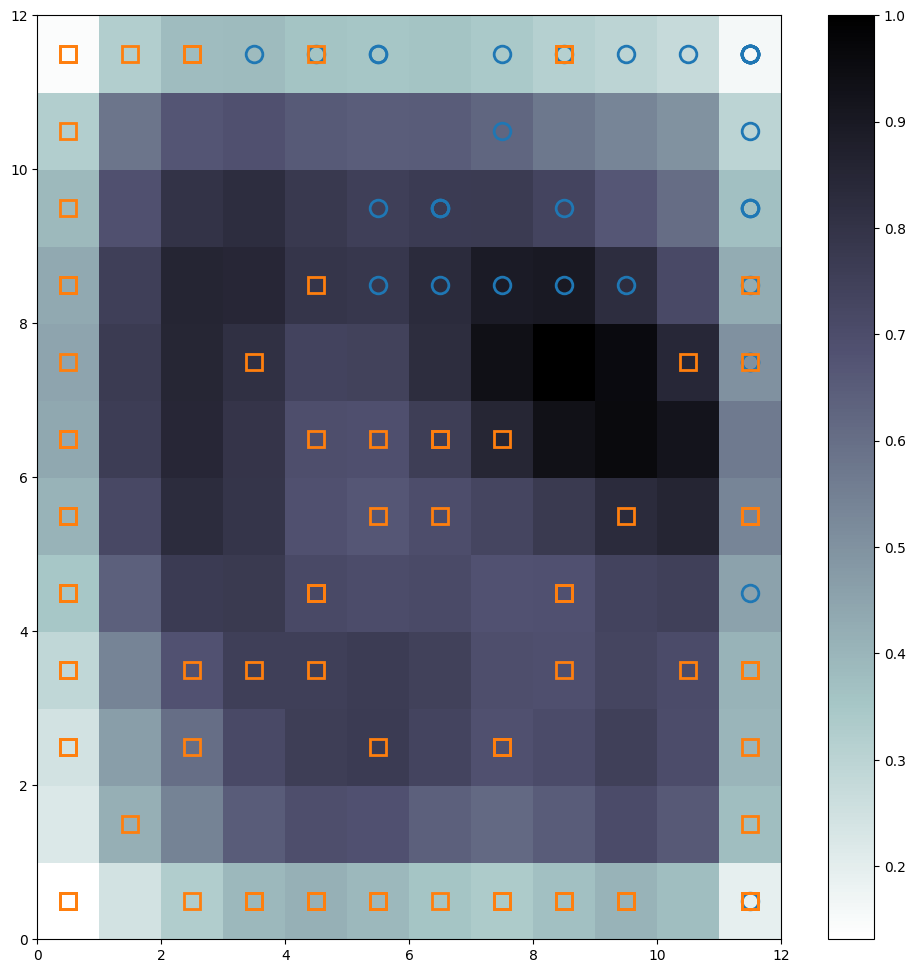

In [6]:
cl.mapSoms(som, labels, darr, n_neurons, m_neurons)

In [7]:
cl.use_kmeans(somlist, labels, 2)

(KMeans(n_clusters=2), 0.685077519379845)

In [8]:
cl.use_kmeans(somlist, kmeans.labels_, 2)

(KMeans(n_clusters=2), 0.7061531007751938)

In [9]:
cl.use_kmeans(darr, labels, 2)

(KMeans(n_clusters=2), 0.8173449612403101)

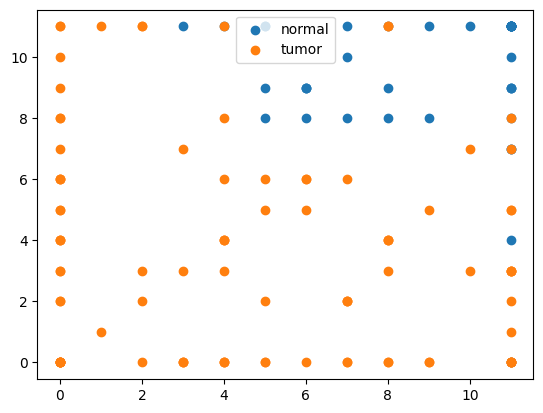

In [10]:
cl.plotKMeans(somlist, labels, labels)

In [11]:
print(darr)

[[ 9.33628339 13.61343266 10.59525748 ...  8.9230303   9.84784036
   9.84784036]
 [ 9.89618101 13.75110466 10.89292222 ...  8.49385545 10.11777295
  10.11777295]
 [ 8.93604896 12.06924835  9.86897685 ...  8.96895473  9.88371245
   9.88371245]
 ...
 [ 4.24412594  9.00084508  7.20261362 ...  9.12979817 10.30309576
  10.30309576]
 [ 3.1210154   7.29920802  7.60880924 ...  8.80703286  9.98797452
   9.98797452]
 [ 2.48542683  5.91169158  5.99322147 ...  8.04548666 10.51323411
  10.51323411]]


In [12]:
print(labels)

['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor'
 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'tum

In [13]:
kmeans.fit(darr)

KMeans(n_clusters=3)

In [14]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 2 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]


In [15]:
k2 = cl.K(darr)
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(somlist)

KMeans(n_clusters=2)

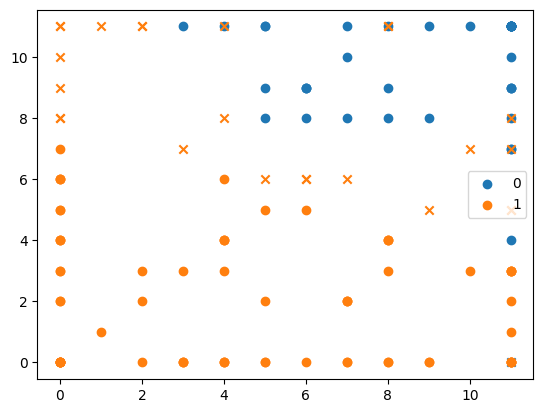

In [16]:
cl.plotKMeans(somlist, labels, kmeans2.labels_)

In [17]:
yo = pd.factorize(labels)

In [18]:
yo[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
print(len(somlist))

129


In [20]:
print(len(set(somlist)))

69


In [21]:
winner = 0
r = 0
rand = []
for t in range(3):
    for n in range(3, 20):
        print(str(t) + " and  " + str(n))
        n_neurons = n
        m_neurons = n
        som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

        som.pca_weights_init(darr)
        som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

        somlist = []
        for x in range(len(darr)):
            somlist.append(som.winner(darr[x]))
    
        w = cl.use_kmeans(somlist, labels, 2)
        print(w[1])
        nur[n-3].append(w[1])
        
        if w[1] > winner:
            winner = w[1]
            r = n

    print(winner)
    print(r) 
    print(nur)    
    

0 and  3


/Users/astewart/Library/Python/3.9/lib/python/site-packages/minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [  649 / 1000 ]  65% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 65.13915168947678
0.6162790697674418


NameError: name 'nur' is not defined

In [ ]:
nur = [[i] for i in range(3, 20)]

In [ ]:
#finding optimal number of neurons independently 
winner = 0
r = 0
rand = []
for t in range(3):
    for n in range(3, 20):
        print(str(t) + " and  " + str(n))
        n_neurons = n
        m_neurons = n
        som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

        som.pca_weights_init(darr)
        som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

        somlist = []
        for x in range(len(darr)):
            somlist.append(som.winner(darr[x]))
    
        w = cl.use_kmeans(somlist, labels, 2)
        print(w[1])
        nur[n-3].append(w[1])
        
        if w[1] > winner:
            winner = w[1]
            r = n

    print(winner)
    print(r) 
    print(nur)    
    

In [ ]:
print(y)

In [ ]:
from openpyxl import Workbook

wb = Workbook()
ws = wb.active

for i in range(len(nur)):
    for j in range(len(nur[i])):
        ws.cell(row=i+1, column=j+1, value=nur[i][j])

wb.save('output3.xlsx')

In [ ]:
sig = [[i] for i in range(2, 11)]

In [ ]:
winnerS = 0
r = 0
rand = []
for t in range(3):
    for n in range(2, 11):
        print(str(t) + " and  " + str(n))
        n_neurons = 12
        m_neurons = 12
        som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=n, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

        som.pca_weights_init(darr)
        som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

        somlist = []
        for x in range(len(darr)):
            somlist.append(som.winner(darr[x]))
    
        w = cl.use_kmeans(somlist, labels, 2)
        print(w[1])
        sig[n-3].append(w[1])
        
        if w[1] > winnerS:
            winner = w[1]
            r = n

    print(winnerS)
    print(r) 
    print(sig)    
    